In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv

In [2]:
df = pd.read_csv('/home/saddra/Downloads/yelp_training_set_review.csv')

In [3]:
df.head(10)

,Unnamed: 0,business_blank,business_categories,business_city,business_full_address,business_id,business_latitude,business_longitude,business_name,business_neighborhoods,...,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_type,reviewer_useful,stars,text,type,useful,user_id
0,0,False,Breakfast & Brunch; Restaurants,Phoenix,"6106 S 32nd St\nPhoenix, AZ 85042",9yKzy9PApeiPPOUJEtnvkg,33.390792,-112.012504,Morning Glory Cafe,NaN,...,331,Jason,376,user,1034,5,My wife took me here on my birthday for breakf...,review,5,rLtl8ZkDX5vH5nAx9C3q5Q
1,1,False,Italian; Pizza; Restaurants,Phoenix,"4848 E Chandler Blvd\nPhoenix, AZ 85044",ZRJwVLyzEJq1VAihDhYiow,33.305607,-111.978758,Spinato's Pizzeria,NaN,...,2,Paul,2,user,0,5,I have no idea why some people give bad review...,review,0,0a2KyEL0d3Yb1V6aivbIuQ
2,2,False,Middle Eastern; Restaurants,Tempe,"1513 E Apache Blvd\nTempe, AZ 85281",6oRAC4uyJCsJl1X0WZpVSA,33.414345,-111.913031,Haji-Baba,NaN,...,0,Nicole,3,user,3,4,love the gyro plate. Rice is so good and I als...,review,1,0hT2KtfLiobPvh6cDC8JQg
3,3,False,Active Life; Dog Parks; Parks,Scottsdale,"5401 N Hayden Rd\nScottsdale, AZ 85250",_1QQZuf4zZOyFCvXc0o6Vg,33.522945,-111.907886,Chaparral Dog Park,NaN,...,18,lindsey,31,user,75,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,2,uZetl9T0NcROGOyFfughhg
4,4,False,Tires; Automotive,Mesa,"1357 S Power Road\nMesa, AZ 85206",6ozycU1RpktNG2-1BroVtw,33.391027,-111.684482,Discount Tire,NaN,...,3,Roger,28,user,32,5,General Manager Scott Petello is a good egg!!!...,review,0,vYmM4KTsC8ZfQBg-j5MWkw
5,5,False,Wine Bars; Bars; American (New); Nightlife; Re...,Phoenix,"6106 S 32nd St\nPhoenix, AZ 85042",-yxfBYGB6SEqszmxJxd97A,33.390792,-112.012504,Quiessence Restaurant,NaN,...,743,Deborah,654,user,1584,4,"Quiessence is, simply put, beautiful. Full wi...",review,3,sqYN3lNgvPbPCTRsMFu27g
6,6,False,Mexican; Restaurants,Phoenix,"1919 N 16th St\nPhoenix, AZ 85006",zp713qNhx8d9KCJJnrw1xA,33.469132,-112.047512,La Condesa Gourmet Taco Shop,NaN,...,1187,Monique,295,user,1376,5,Drop what you're doing and drive here. After I...,review,7,wFweIWhv2fREZV_dYkz_1g
7,7,False,Hotels & Travel; Airports,Phoenix,"3400 E Sky Harbor Blvd\nPhoenix, AZ 85034",hW0Ne_HTHEAgGF1rAdmR-g,33.434750,-112.006440,Phoenix Sky Harbor International Airport,NaN,...,85,Heather,173,user,164,4,"Luckily, I didn't have to travel far to make m...",review,1,1ieuYcKS7zeAv_U15AB13A
8,8,False,Sushi Bars; Restaurants,Phoenix,"2574 E Camelback Rd\nPhoenix, AZ 85016",wNUea3IXZWD63bbOQaOH-g,33.509605,-112.025740,Stingray Sushi,NaN,...,9,Sherri,18,user,11,4,Definitely come for Happy hour! Prices are ama...,review,0,Vh_DlizgGhSqQh4qfZ2h6A
9,9,False,Food; Tea Rooms; Japanese; Restaurants,Phoenix,"622 E Adams St\nPhoenix, AZ 85004",nMHhuYan8e3cONo3PornJA,33.449539,-112.065664,Nobuo At Teeter House,NaN,...,0,Mark,6,user,4,5,Nobuo shows his unique talents with everything...,review,1,sUNkXg8-KFtCMQDV6zRzQg


In [4]:
df.dropna(axis=0,how='any',subset=['business_latitude','business_longitude'],inplace=True)

In [5]:
# Variable with the reviewer count and stars
X=df.loc[:,['business_id','reviewer_review_count','stars']]

In [6]:
X.head(10)

,business_id,reviewer_review_count,stars
0,9yKzy9PApeiPPOUJEtnvkg,376,5
1,ZRJwVLyzEJq1VAihDhYiow,2,5
2,6oRAC4uyJCsJl1X0WZpVSA,3,4
3,_1QQZuf4zZOyFCvXc0o6Vg,31,5
4,6ozycU1RpktNG2-1BroVtw,28,5
5,-yxfBYGB6SEqszmxJxd97A,654,4
6,zp713qNhx8d9KCJJnrw1xA,295,5
7,hW0Ne_HTHEAgGF1rAdmR-g,173,4
8,wNUea3IXZWD63bbOQaOH-g,18,4
9,nMHhuYan8e3cONo3PornJA,6,5


In [7]:
K_clusters = range(1,10)

kmeans = [KMeans(n_clusters=i) for i in K_clusters]

Y_axis = df[['reviewer_review_count']]
X_axis = df[['stars']]

score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

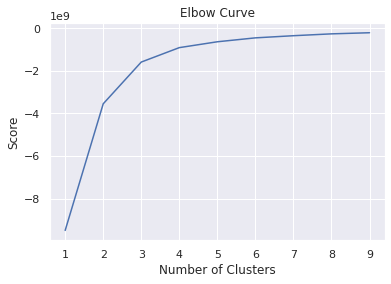

In [8]:
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve')

plt.show()

In [9]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering. # Compute k-means clustering.

X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:2]])

centers = kmeans.cluster_centers_ # Coordinates of cluster centers.

labels = kmeans.predict(X[X.columns[1:2]]) # Labels of each point

X.head(10)

,business_id,reviewer_review_count,stars,cluster_label
0,9yKzy9PApeiPPOUJEtnvkg,376,5,1
1,ZRJwVLyzEJq1VAihDhYiow,2,5,0
2,6oRAC4uyJCsJl1X0WZpVSA,3,4,0
3,_1QQZuf4zZOyFCvXc0o6Vg,31,5,0
4,6ozycU1RpktNG2-1BroVtw,28,5,0
5,-yxfBYGB6SEqszmxJxd97A,654,4,1
6,zp713qNhx8d9KCJJnrw1xA,295,5,1
7,hW0Ne_HTHEAgGF1rAdmR-g,173,4,0
8,wNUea3IXZWD63bbOQaOH-g,18,4,0
9,nMHhuYan8e3cONo3PornJA,6,5,0


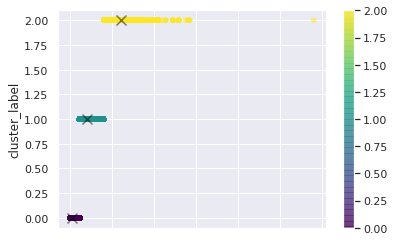

In [10]:
#clustering the data based on reviewers_review_count of each business

X.plot.scatter(x = 'reviewer_review_count', y = 'cluster_label',c=labels, alpha=0.5, cmap='viridis')
plt.scatter(centers[:, 0], [0,1,2], c='black', s=100,marker='x', alpha=0.5)

In [11]:
X.groupby('cluster_label').mean()

,reviewer_review_count,stars
cluster_label,,
0,49.504128,3.776381
1,395.921017,3.715131
2,1210.050186,3.714551


Cluster  0 
 5    67893
4    64873
Name: stars, dtype: int64
Cluster  1 
 4    13292
5     7579
Name: stars, dtype: int64
Cluster  2 
 4    1713
5     721
Name: stars, dtype: int64


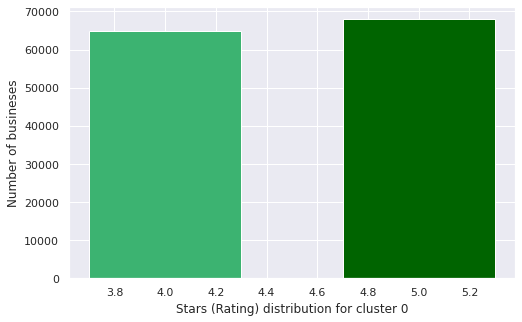

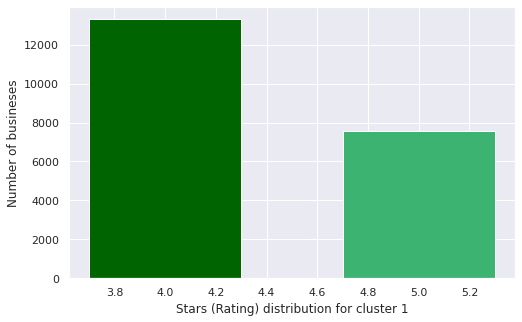

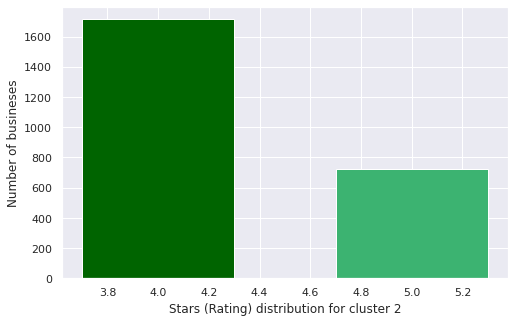

In [12]:
#Checking if each cluster can be distinguished based on star/rating

for i in range(0,3):
    a=X[(X['cluster_label']==i) & (X['stars']>3)]['stars'].value_counts()
    print('Cluster ',i,'\n',a)

    plt.figure(figsize=(8,5))
    # colors are in the order 5, 4, 3, 1, 2
    bar_colors = ['darkgreen', 'mediumseagreen', 'gold', 'crimson', 'orange']
    plt.bar(a.index, a.values, color=bar_colors, width=.6)
    p='Stars (Rating) distribution for cluster '+str(i)
    plt.xlabel(p)
    plt.ylabel('Number of busineses')

In [13]:
##CONCLUSION - Shows that the 0 cluster(consists of highly reviewed restaurant) has higher ratings 

In [22]:
## Next part of clustering,we are gonna plot geographical map using the latitude and longitude
df.dropna(axis=0,how='any',subset=['business_latitude','business_longitude'],inplace=True)

In [15]:
# Variable with the Longitude and Latitude
X=df.loc[:,['business_id','business_latitude','business_longitude']]

In [16]:
X.head(10)

,business_id,business_latitude,business_longitude
0,9yKzy9PApeiPPOUJEtnvkg,33.390792,-112.012504
1,ZRJwVLyzEJq1VAihDhYiow,33.305607,-111.978758
2,6oRAC4uyJCsJl1X0WZpVSA,33.414345,-111.913031
3,_1QQZuf4zZOyFCvXc0o6Vg,33.522945,-111.907886
4,6ozycU1RpktNG2-1BroVtw,33.391027,-111.684482
5,-yxfBYGB6SEqszmxJxd97A,33.390792,-112.012504
6,zp713qNhx8d9KCJJnrw1xA,33.469132,-112.047512
7,hW0Ne_HTHEAgGF1rAdmR-g,33.434750,-112.006440
8,wNUea3IXZWD63bbOQaOH-g,33.509605,-112.025740
9,nMHhuYan8e3cONo3PornJA,33.449539,-112.065664


In [17]:
K_clusters = range(1,10)

kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df[['business_latitude']]
X_axis = df[['business_longitude']]

score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
print(score)

[-2759.2837848387608, -1207.794019500346, -526.0507304799823, -366.81994681861494, -272.0482252804859, -186.3358673693002, -135.17016746591835, -98.13794885454166, -79.81982425115966]


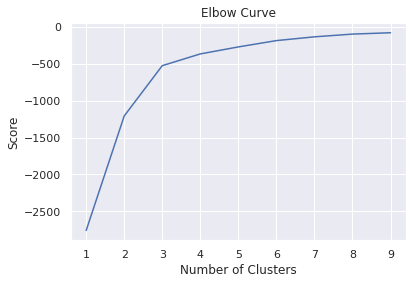

In [18]:
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve')

plt.show()

In [19]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering. # Compute k-means clustering.

X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])

centers = kmeans.cluster_centers_ # Coordinates of cluster centers.

labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point

X.head(10)

,business_id,business_latitude,business_longitude,cluster_label
0,9yKzy9PApeiPPOUJEtnvkg,33.390792,-112.012504,2
1,ZRJwVLyzEJq1VAihDhYiow,33.305607,-111.978758,2
2,6oRAC4uyJCsJl1X0WZpVSA,33.414345,-111.913031,2
3,_1QQZuf4zZOyFCvXc0o6Vg,33.522945,-111.907886,0
4,6ozycU1RpktNG2-1BroVtw,33.391027,-111.684482,2
5,-yxfBYGB6SEqszmxJxd97A,33.390792,-112.012504,2
6,zp713qNhx8d9KCJJnrw1xA,33.469132,-112.047512,1
7,hW0Ne_HTHEAgGF1rAdmR-g,33.434750,-112.006440,0
8,wNUea3IXZWD63bbOQaOH-g,33.509605,-112.025740,1
9,nMHhuYan8e3cONo3PornJA,33.449539,-112.065664,1


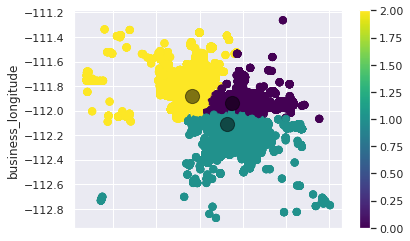

In [20]:
X.plot.scatter(x = 'business_latitude', y = 'business_longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [21]:
##This is the geographical map of all the hotels in our dataset